## Road Freight in EU

We will pull data from eurostats and clean up the road freight data in EU.

### Install Packages

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

In [243]:
import networkx as nx

### Load Data

Goods loaded in reporting country:

`https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia7lgtt.tsv.gz`

Good unloaded in reporting country:

`https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_iq_utt.tsv.gz`


In [3]:
source_loaded = "assets/road-freight-eurostats/road_go_ia_ltt.tsv"
source_unloaded = "assets/road-freight-eurostats/road_go_ia_utt.tsv"

In [4]:
df_load = pd.read_csv(source_loaded, sep='[\t|,]', na_values=[': ', ':'])
df_unload = pd.read_csv(source_unloaded, sep='[\t|,]', na_values=[': ', ':'])

/Users/leima/anaconda3/envs/theflow-code/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/leima/anaconda3/envs/theflow-code/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [5]:
df_load.sample(10)

,unit,carriage,c_unload,geo\time,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
536,MIO_TKM,HIRE,EU27_2007,NO,909.0,1147.0,1478.0,1306.0,1317.0,1251.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,MIO_TKM,HIRE,DK,CY,2.0,2.0,2.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3660,MIO_TKM,TOT,NL,BE,998.0,1070.0,1048.0,950.0,1011.0,957.0,...,1005.0,817.0,885.0,823.0,798.0,809.0,744.0,658.0,556.0,583.0
2112,MIO_TKM,OWN,HR,PL,16.0,38.0,8.0,8.0,42.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,MIO_TKM,OWN,EU28,DK,82.0,57.0,59.0,58.0,42.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3482,MIO_TKM,TOT,KZ,LV,87.0,30.0,14.0,30.0,214.0,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1281,MIO_TKM,HIRE,RU,SI,164.0,113.0,71.0,116.0,225.0,176.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1249,MIO_TKM,HIRE,RS_ME,LU,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3717,MIO_TKM,TOT,NO,UK,5.0,46.0,2.0,1.0,NaN,0.0,...,2.0,4.0,13.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1270,MIO_TKM,HIRE,RU,HR,19.0,NaN,NaN,21.0,17.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_unload.sample(10)

,unit,carriage,c_load,geo\time,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
2735,MIO_TKM,TOT,EE,HU,NaN,NaN,5.0,NaN,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3769,MIO_TKM,TOT,UK,IE,407.0,387.0,406.0,397.0,381.0,369.0,...,135.0,181.0,185.0,167.0,159.0,134.0,107.0,90.0,103.0,76.0
2048,MIO_TKM,OWN,LI,CZ,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1330,MIO_TKM,HIRE,UA,EU15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1314,MIO_TKM,HIRE,TR,LU,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348,MIO_TKM,HIRE,UK,CH,NaN,31.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2712,MIO_TKM,TOT,EA,IE,NaN,NaN,NaN,NaN,NaN,NaN,...,266.0,311.0,355.0,260.0,251.0,272.0,253.0,172.0,189.0,142.0
932,MIO_TKM,HIRE,MA,PT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,MIO_TKM,HIRE,AT,DK,NaN,2.0,3.0,10.0,3.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2462,MIO_TKM,TOT,AT,PT,144.0,164.0,39.0,33.0,19.0,91.0,...,21.0,25.0,12.0,52.0,19.0,0.0,NaN,NaN,NaN,NaN


### Clean Up 

The meaning of keys are illustrated here:
https://ec.europa.eu/eurostat/cache/metadata/en/road_go_esms.htm



rename columns

In [7]:
df_load.rename(
    columns={
        "geo\\time": "origin",
        "c_unload": "destination"
    },
    inplace=True
)

df_unload.rename(
    columns={
        "geo\\time": "destination",
        "c_load": "origin"
    },
    inplace=True
)

In [8]:
for col in df_load.columns:
    df_load.rename(
        columns={
            col: col.strip()
        },
        inplace=True
    )

for col in df_unload.columns:
    df_unload.rename(
        columns={
            col: col.strip()
        },
        inplace=True
    )


In [9]:
df_load.replace({df_load["2019"].iloc[0], 1000})

,unit,carriage,destination,origin,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
0,MIO_TKM,HIRE,AD,CZ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MIO_TKM,HIRE,AD,DE,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MIO_TKM,HIRE,AD,ES,46.0,54.0,18.0,29.0,68.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MIO_TKM,HIRE,AD,FR,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MIO_TKM,HIRE,AD,HU,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,MIO_TKM,TOT,WORLD,SE,1255.0,1453.0,1791.0,1658.0,1828.0,1617.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4124,MIO_TKM,TOT,WORLD,SI,5618.0,5661.0,5152.0,4702.0,4771.0,4308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4125,MIO_TKM,TOT,WORLD,SK,8472.0,8683.0,8290.0,8357.0,7902.0,6942.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4126,MIO_TKM,TOT,WORLD,UK,3073.0,3315.0,3072.0,2959.0,3487.0,3788.0,...,5604.0,5413.0,4519.0,3900.0,3255.0,2110.0,2003.0,2073.0,2037.0,1767.0


<AxesSubplot:>

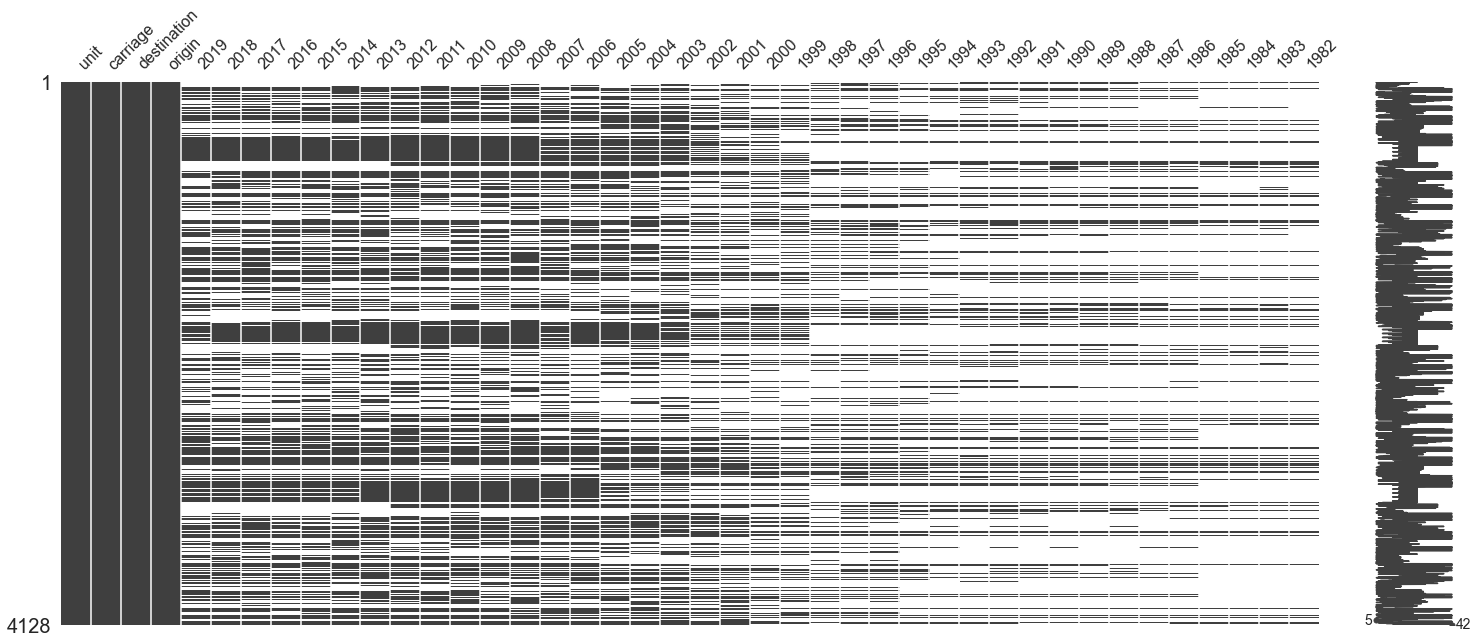

In [10]:
msno.matrix(df_load)

<AxesSubplot:>

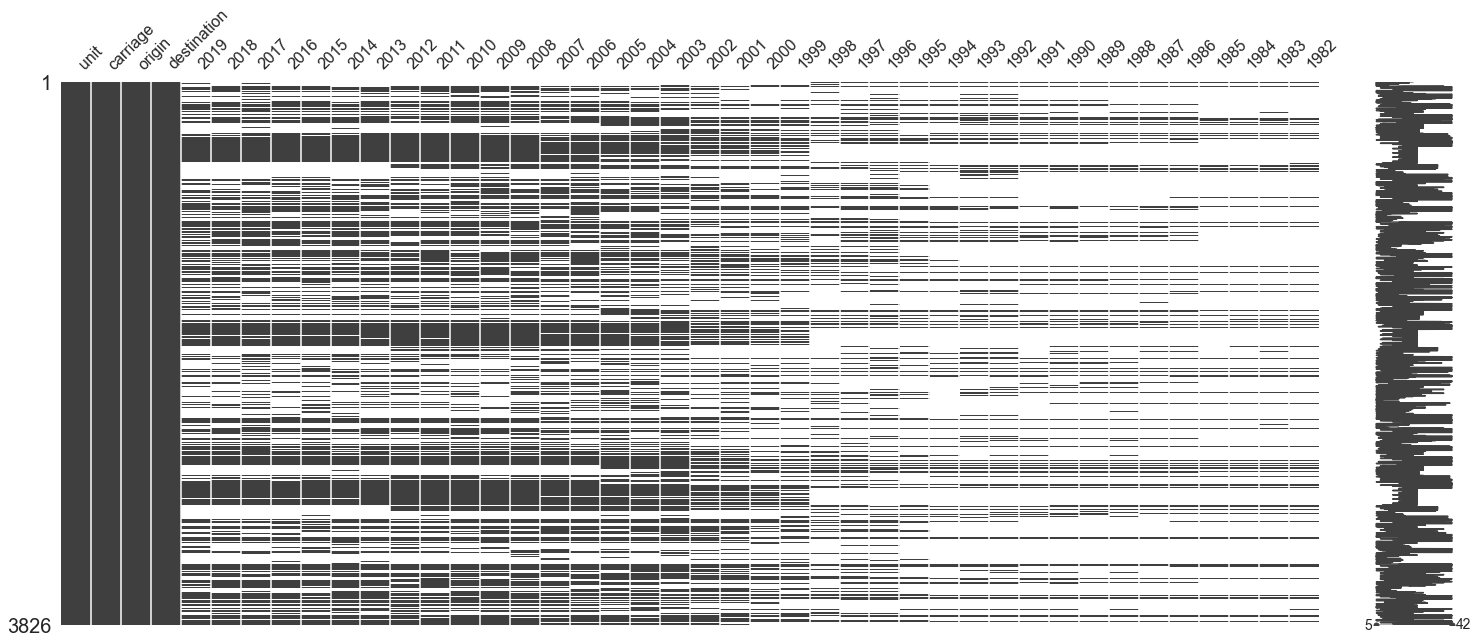

In [11]:
msno.matrix(df_unload)

Here is brief look into the data

In [12]:
df_load.columns

Index(['unit', 'carriage', 'destination', 'origin', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990',
       '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982'],
      dtype='object')

In [13]:
df_load.unit.unique()

array(['MIO_TKM'], dtype=object)

In [14]:
df_load.carriage.unique()

array(['HIRE', 'NOT_SPEC', 'OWN', 'TOT'], dtype=object)

- `HIRE`: hire or reward
- `OWN`: 

In [15]:
df_load.destination.unique()

array(['AD', 'AF', 'AFR_N', 'AL', 'AM', 'AT', 'AZ', 'BA', 'BE', 'BG',
       'BH', 'BY', 'CH', 'CY', 'CZ', 'CZ_SK', 'DE', 'DK', 'DZ', 'EA',
       'EE', 'EEA_X_LI', 'EG', 'EH', 'EL', 'ES', 'EU15', 'EU25',
       'EU27_2007', 'EU27_2020', 'EU28', 'EUR_OTH', 'EXT_EU15', 'EX_DD',
       'EX_SU', 'EX_YU', 'FI', 'FR', 'GE', 'GI', 'HR', 'HU', 'IE', 'IL',
       'IQ', 'IR', 'IS', 'IT', 'JO', 'KG', 'KZ', 'LB', 'LI', 'LT', 'LU',
       'LV', 'MA', 'MC', 'MD', 'ME', 'MK', 'MN', 'MT', 'NE', 'NL', 'NO',
       'OTH', 'PL', 'PT', 'RO', 'RS', 'RS_ME', 'RU', 'SE', 'SI', 'SK',
       'SL', 'SM', 'SY', 'TJ', 'TM', 'TN', 'TR', 'UA', 'UK', 'UNK', 'US',
       'UZ', 'VA', 'WORLD', 'XK'], dtype=object)

In [16]:
df_load.origin.unique()

array(['CZ', 'DE', 'ES', 'FR', 'HU', 'LU', 'NL', 'PT', 'UK', 'LV', 'DK',
       'EL', 'EU15', 'IE', 'IT', 'AT', 'BE', 'BG', 'CY', 'FI', 'HR', 'RO',
       'SE', 'SI', 'LT', 'PL', 'SK', 'CH', 'EE', 'LI', 'NO'], dtype=object)

For the purpose of demonstration, we will only use part of the data.

- We will only look at 2019
- We will only look at HIRE

In [17]:
lunl_c_origin = [
    i for i in set.intersection(
        set(df_load.origin.unique()), 
        set(df_load.destination.unique())
    ) if len(i) == 2
]

df_load_selected = df_load[['unit', 'carriage', 'destination', 'origin', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010']]
df_load_selected_com = df_load_selected.loc[
    (
        df_load_selected.carriage == "HIRE"
    ) & (
        df_load_selected.destination.isin(lunl_c_origin)
    ) & (
        df_load_selected.origin.isin(lunl_c_origin)
    ) 
]
df_load_selected_com#.sample(10)


,unit,carriage,destination,origin,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
48,MIO_TKM,HIRE,AT,BE,53.0,85.0,53.0,55.0,102.0,11.0,19.0,21.0,19.0,18.0
49,MIO_TKM,HIRE,AT,BG,126.0,97.0,229.0,119.0,147.0,95.0,220.0,131.0,66.0,46.0
50,MIO_TKM,HIRE,AT,CH,9.0,20.0,20.0,16.0,30.0,46.0,53.0,37.0,64.0,47.0
51,MIO_TKM,HIRE,AT,CY,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
52,MIO_TKM,HIRE,AT,CZ,454.0,478.0,678.0,577.0,700.0,779.0,722.0,651.0,572.0,589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,MIO_TKM,HIRE,UK,PT,460.0,380.0,617.0,742.0,516.0,270.0,403.0,366.0,408.0,236.0
1469,MIO_TKM,HIRE,UK,RO,211.0,371.0,314.0,390.0,420.0,370.0,281.0,280.0,364.0,514.0
1470,MIO_TKM,HIRE,UK,SE,NaN,NaN,3.0,NaN,NaN,NaN,4.0,5.0,12.0,1.0
1471,MIO_TKM,HIRE,UK,SI,121.0,176.0,135.0,193.0,211.0,157.0,221.0,144.0,197.0,186.0


In [18]:
years = ['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010']

In [19]:
df_unload_19 = df_unload[['unit', 'carriage', 'origin', 'destination'] + years]
df_unload_19_com = df_unload_19.loc[
    (
        df_unload_19.carriage == "HIRE"
    ) & (
        df_unload_19.origin.apply(lambda x: len(x)==2)
    )  
]
df_unload_19_com.sample(10)

,unit,carriage,origin,destination,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
83,MIO_TKM,HIRE,BA,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124,MIO_TKM,HIRE,RO,FR,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
54,MIO_TKM,HIRE,AT,NO,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
788,MIO_TKM,HIRE,IE,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,MIO_TKM,HIRE,UA,SK,6.0,6.0,5.0,10.0,91.0,28.0,44.0,17.0,39.0,8.0
1286,MIO_TKM,HIRE,SL,EL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,MIO_TKM,HIRE,LU,LU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,MIO_TKM,HIRE,IR,NL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,MIO_TKM,HIRE,GE,PL,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN
398,MIO_TKM,HIRE,ES,DE,378.0,344.0,464.0,303.0,538.0,535.0,586.0,814.0,950.0,1288.0


In [20]:
df_load_selected.to_csv("assets/road-freight-eurostats/eurostats_load_selected.csv")

## Construct the Matrix

In [21]:
df_lunl = df_load_selected_com.pivot(index='origin', columns='destination', values='2019')
df_lunl

destination,AT,BE,BG,CH,CY,CZ,DE,DK,EE,EL,...,LV,NL,NO,PL,PT,RO,SE,SI,SK,UK
origin,,,,,,,,,,,,,,,,,,,,,
AT,NaN,55.0,21.0,98.0,NaN,42.0,1404.0,18.0,NaN,31.0,...,NaN,62.0,17.0,10.0,NaN,NaN,45.0,27.0,33.0,36.0
BE,53.0,NaN,15.0,77.0,NaN,11.0,1102.0,23.0,NaN,NaN,...,NaN,807.0,NaN,36.0,31.0,NaN,NaN,5.0,NaN,152.0
BG,126.0,24.0,NaN,NaN,NaN,44.0,382.0,22.0,NaN,461.0,...,NaN,77.0,NaN,144.0,36.0,297.0,107.0,18.0,28.0,45.0
CH,9.0,22.0,NaN,NaN,NaN,NaN,191.0,NaN,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
CY,0.0,0.0,0.0,0.0,NaN,0.0,1.0,2.0,NaN,1.0,...,0.0,1.0,NaN,0.0,0.0,0.0,1.0,NaN,0.0,9.0
CZ,454.0,227.0,24.0,84.0,NaN,NaN,2317.0,58.0,NaN,37.0,...,NaN,304.0,45.0,201.0,26.0,17.0,73.0,33.0,631.0,137.0
DE,2050.0,1981.0,8.0,1752.0,NaN,443.0,NaN,1257.0,NaN,13.0,...,NaN,2741.0,106.0,432.0,306.0,32.0,270.0,25.0,59.0,689.0
DK,47.0,2.0,NaN,3.0,NaN,NaN,344.0,NaN,NaN,NaN,...,NaN,79.0,400.0,45.0,NaN,NaN,643.0,NaN,NaN,65.0
EE,11.0,NaN,NaN,NaN,NaN,NaN,194.0,22.0,NaN,NaN,...,108.0,54.0,15.0,41.0,NaN,NaN,88.0,NaN,NaN,NaN


<AxesSubplot:xlabel='destination', ylabel='origin'>

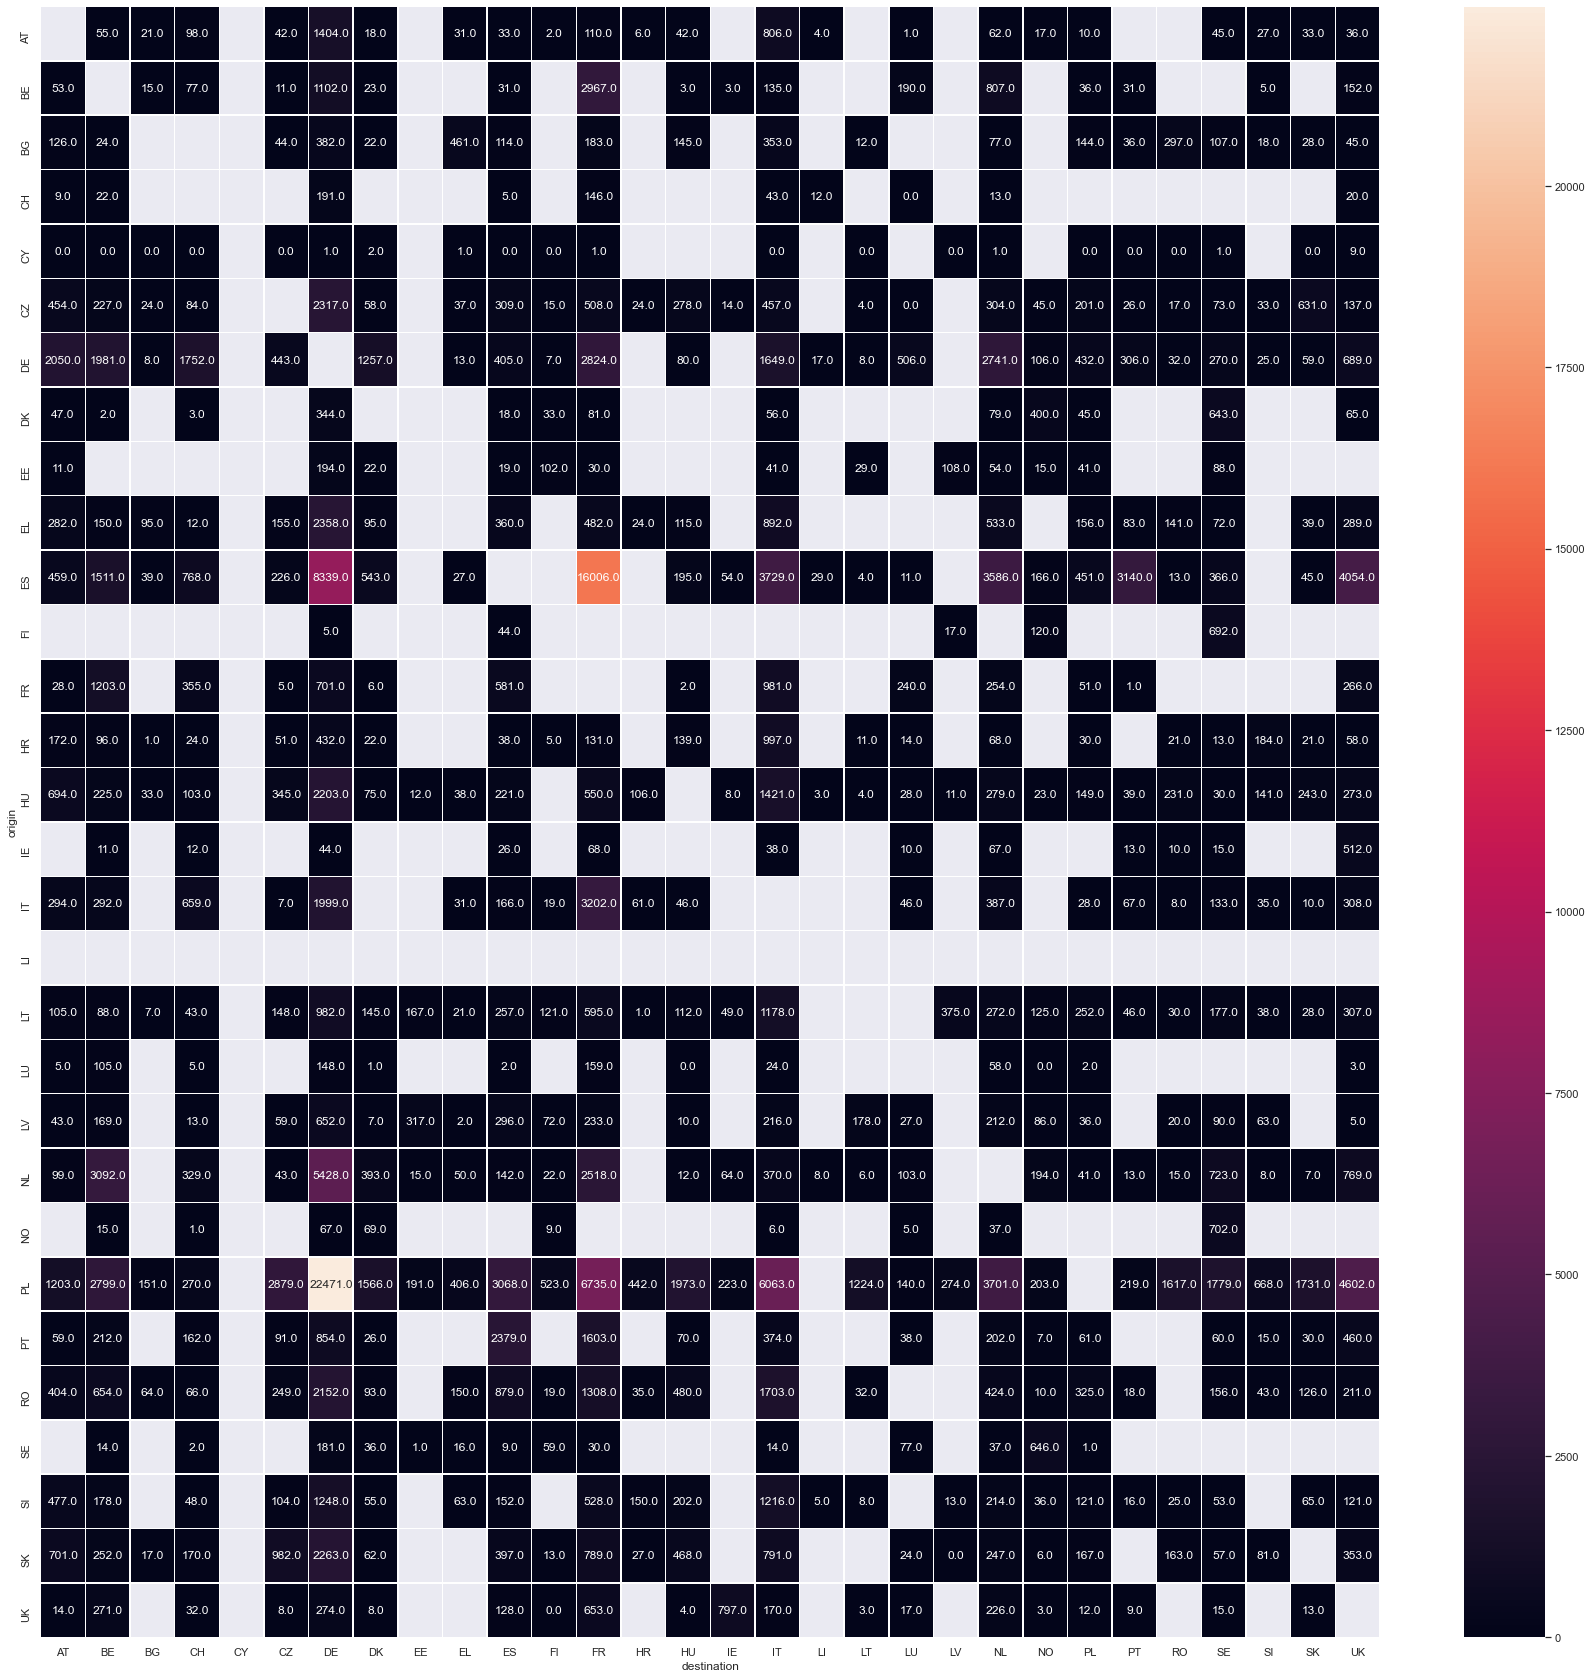

In [22]:
fig, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(
    df_lunl, annot=True, fmt="0.1f", linewidths=.5, ax=ax
)

In [297]:
df_load_selected_com.head()

,unit,carriage,destination,origin,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
48,MIO_TKM,HIRE,AT,BE,53.0,85.0,53.0,55.0,102.0,11.0,19.0,21.0,19.0,18.0
49,MIO_TKM,HIRE,AT,BG,126.0,97.0,229.0,119.0,147.0,95.0,220.0,131.0,66.0,46.0
50,MIO_TKM,HIRE,AT,CH,9.0,20.0,20.0,16.0,30.0,46.0,53.0,37.0,64.0,47.0
51,MIO_TKM,HIRE,AT,CY,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
52,MIO_TKM,HIRE,AT,CZ,454.0,478.0,678.0,577.0,700.0,779.0,722.0,651.0,572.0,589.0


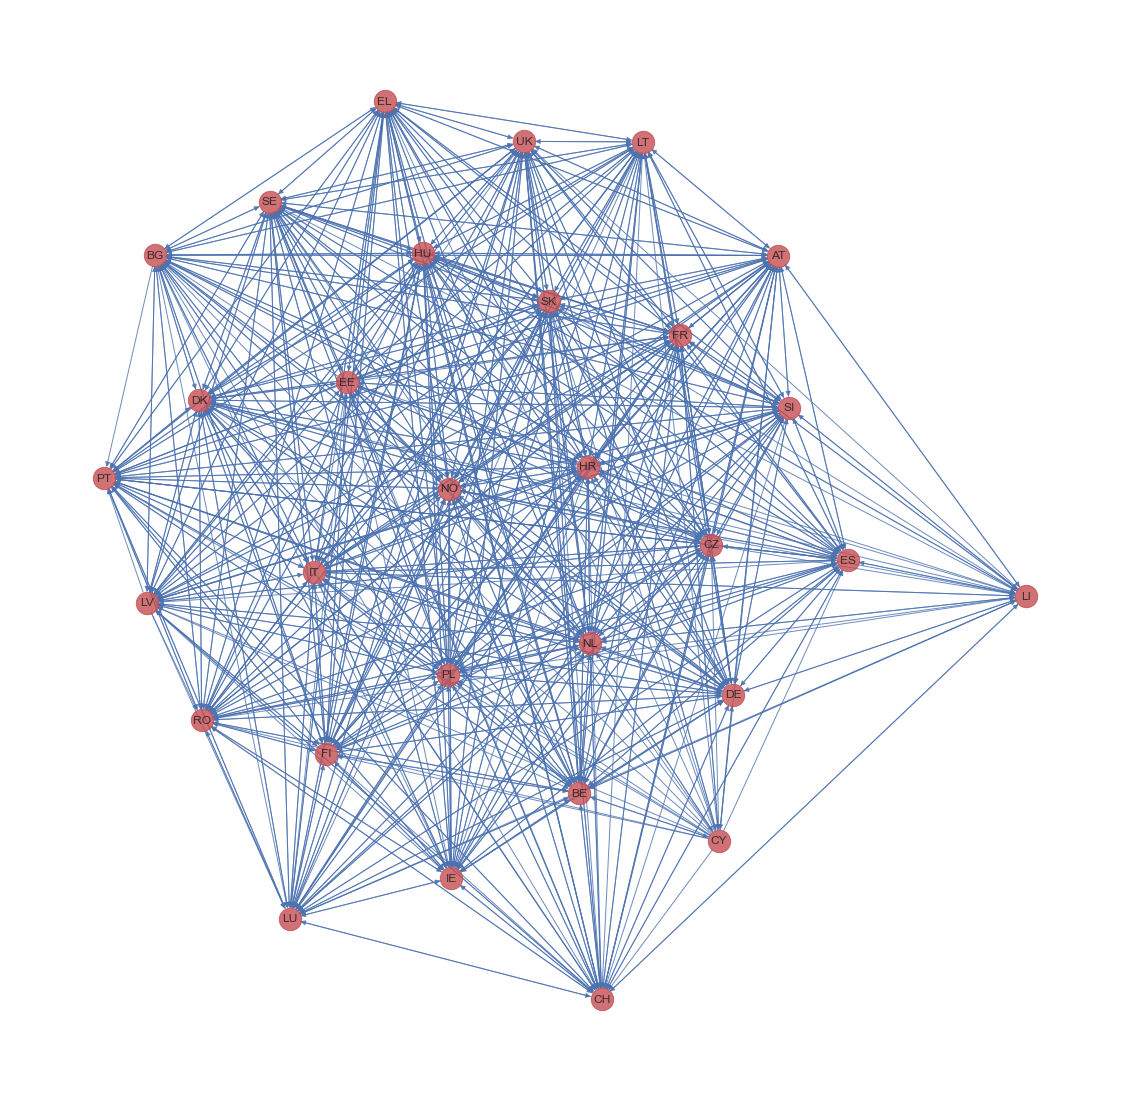

In [312]:
D = nx.from_pandas_edgelist(df_load_selected_com, "origin", "destination", edge_attr="2019", create_using=nx.DiGraph)

fig, ax = plt.subplots(figsize=(20, 20))
nx_draw_options = {
    "node_color": "r",
    "node_size": 500, 
    "alpha": 0.8,
    "edge_color": "b"
}
nx.draw(D, pos=nx.spring_layout(D, k=0.9, iterations=50), ax=ax, with_labels=True, **nx_draw_options)

### Build a Minimal Network

In [23]:
lunl_minimal = ["AT", "CH", "DE"]
df_lunl_minimal = {}
for year in years:
    df_lunl_minimal[year] = df_load_selected_com.pivot(index='origin', columns='destination', values=year).loc[lunl_minimal, lunl_minimal]
    
df_lunl_minimal;

<AxesSubplot:xlabel='destination', ylabel='origin'>

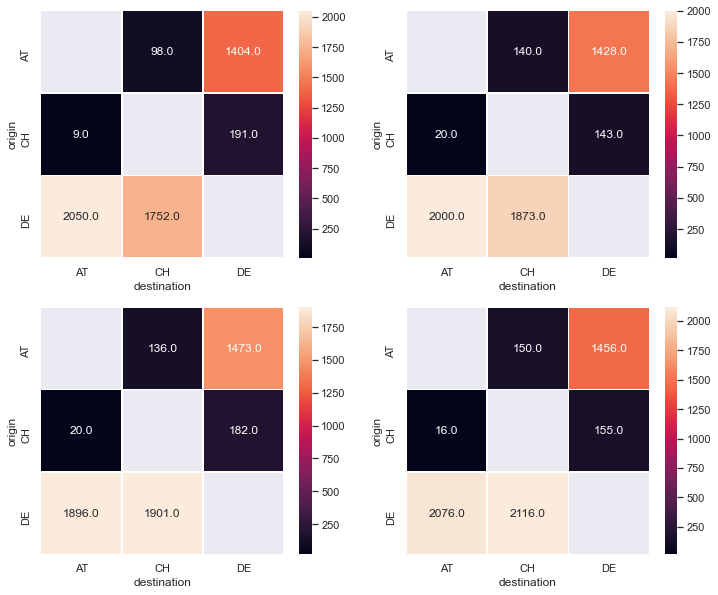

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.heatmap(
    df_lunl_minimal["2019"], annot=True, fmt="0.1f", linewidths=.5, ax=ax[0,0]
)

sns.heatmap(
    df_lunl_minimal["2018"], annot=True, fmt="0.1f", linewidths=.5, ax=ax[0,1]
)

sns.heatmap(
    df_lunl_minimal["2017"], annot=True, fmt="0.1f", linewidths=.5, ax=ax[1,0]
)

sns.heatmap(
    df_lunl_minimal["2016"], annot=True, fmt="0.1f", linewidths=.5, ax=ax[1,1]
)



In [252]:
D_minimal = nx.DiGraph(df_lunl_minimal["2019"])

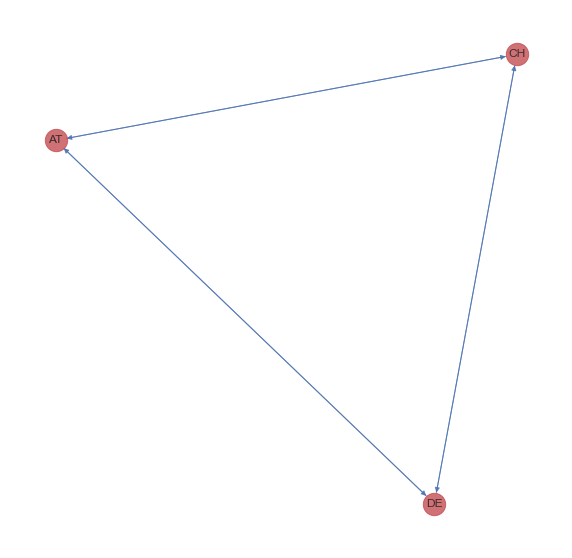

In [316]:
fig, ax = plt.subplots(figsize=(10, 10))
nx_draw_options = {
    "node_color": "r",
    "node_size": 500, 
    "alpha": 0.8,
    "edge_color": "b"
}
nx.draw(D_minimal, pos=nx.spring_layout(D, k=0.4, iterations=10), ax=ax, with_labels=True, **nx_draw_options)


## Naive Model

A naive idea is that the demand on the lane depends on the total demand of the origin and the total demand of the destination.

In [109]:
def naive_model_kpq(o_t, d_t, data):
    
    k_pq = {}
    for p in o_t:
        for q in d_t:
            if p != q:
                k_pq[(p,q)] = data[p][q] / (o_t[p] * d_t[q])
        
    return k_pq

def naive_model(p, q, k_pq, o_t, d_t):
    
    g_pq = k_pq[(p,q)] * (o_t[p] * d_t[q])
        
    return g_pq

In [99]:
df_lunl_minimal["2019"].to_dict()

{'AT': {'AT': nan, 'CH': 9.0, 'DE': 2050.0},
 'CH': {'AT': 98.0, 'CH': nan, 'DE': 1752.0},
 'DE': {'AT': 1404.0, 'CH': 191.0, 'DE': nan}}

In [100]:
total_demand_origin["2019"]

{'AT': 1502.0, 'CH': 200.0, 'DE': 3802.0}

In [101]:
total_demand_dest["2019"]

{'AT': 2059.0, 'CH': 1850.0, 'DE': 1595.0}

In [126]:
naive_kpqs = {}
for year in years:
    naive_kpqs[year] = naive_model_kpq(total_demand_origin[year], total_demand_dest[year], df_lunl_minimal[year].to_dict())


In [131]:
naive_kpqs[year]

{('AT', 'CH'): 8.37794141501648e-06,
 ('AT', 'DE'): 0.00046207319268525015,
 ('CH', 'AT'): 0.00020008003201280514,
 ('CH', 'DE'): 0.0019352568613652356,
 ('DE', 'AT'): 0.00016255303019258526,
 ('DE', 'CH'): 3.604375661642385e-05}

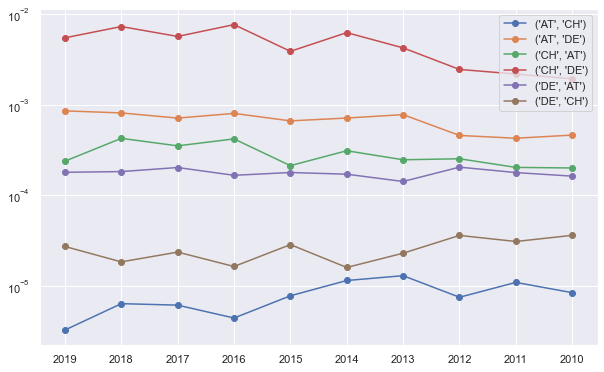

In [138]:
fig, ax = plt.subplots(figsize=(10, 6.18))

for key in naive_kpqs[year]:
    ax.plot(
        naive_kpqs.keys(),
        [val[key] for idx, val in naive_kpqs.items()],
        "-",
        marker="o",
        label=key
    )
    
ax.set_yscale("log")
plt.legend()

In [147]:
total_demand_origin

{'2019': {'AT': 1502.0, 'CH': 200.0, 'DE': 3802.0},
 '2018': {'AT': 1568.0, 'CH': 163.0, 'DE': 3873.0},
 '2017': {'AT': 1609.0, 'CH': 202.0, 'DE': 3797.0},
 '2016': {'AT': 1606.0, 'CH': 171.0, 'DE': 4192.0},
 '2015': {'AT': 1681.0, 'CH': 306.0, 'DE': 4205.0},
 '2014': {'AT': 1685.0, 'CH': 210.0, 'DE': 4310.0},
 '2013': {'AT': 1661.0, 'CH': 310.0, 'DE': 4545.0},
 '2012': {'AT': 2042.0, 'CH': 410.0, 'DE': 4268.0},
 '2011': {'AT': 2292.0, 'CH': 439.0, 'DE': 4740.0},
 '2010': {'AT': 2253.0, 'CH': 476.0, 'DE': 4780.0}}

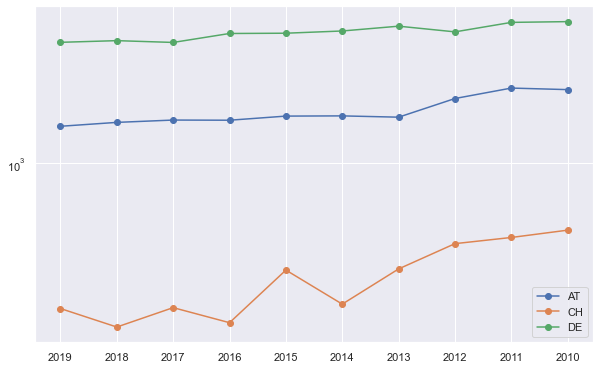

In [149]:
fig, ax = plt.subplots(figsize=(10, 6.18))

for key in total_demand_origin["2019"]:
    ax.plot(
        total_demand_origin.keys(),
        [val[key] for idx, val in total_demand_origin.items()],
        "-",
        marker="o",
        label=key
    )
    
ax.set_yscale("log")
plt.legend()

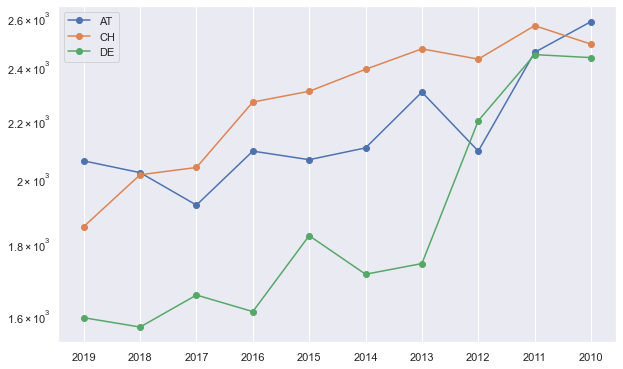

In [155]:
fig, ax = plt.subplots(figsize=(10, 6.18))

for key in total_demand_dest["2019"]:
    ax.plot(
        total_demand_origin.keys(),
        [val[key] for idx, val in total_demand_dest.items()],
        "-",
        marker="o",
        label=key
    )
    
ax.set_yscale("log")
plt.legend()

In [143]:
validate_year = "2018"

naive_kpq = naive_kpqs["2017"]

for i_o in lunl_minimal:
    for i_d in lunl_minimal:
        if i_o != i_d:
            print(
                f"({i_o}, {i_d}):",
                naive_model(i_o, i_d, naive_kpq, total_demand_origin[validate_year], total_demand_dest[validate_year])
            )

(AT, CH): 19.260730555573353
(AT, DE): 1753.906890057625
(CH, AT): 115.69937369519833
(CH, DE): 1456.1178935718347
(DE, AT): 1584.0376921017196
(DE, CH): 183.45562557526424


In [144]:
df_lunl_minimal[validate_year].to_dict()

{'AT': {'AT': nan, 'CH': 20.0, 'DE': 2000.0},
 'CH': {'AT': 140.0, 'CH': nan, 'DE': 1873.0},
 'DE': {'AT': 1428.0, 'CH': 143.0, 'DE': nan}}

In [146]:
df_lunl_minimal["2017"].to_dict()

{'AT': {'AT': nan, 'CH': 20.0, 'DE': 1896.0},
 'CH': {'AT': 136.0, 'CH': nan, 'DE': 1901.0},
 'DE': {'AT': 1473.0, 'CH': 182.0, 'DE': nan}}

In [154]:
df_lunl_minimal["2018"] - df_lunl_minimal["2017"]

destination,AT,CH,DE
origin,,,
AT,NaN,4.0,-45.0
CH,0.0,NaN,-39.0
DE,104.0,-28.0,NaN


In [172]:
total_demand_origin["2015"]

{'AT': 1681.0, 'CH': 306.0, 'DE': 4205.0}

In [173]:
total_demand_dest["2015"]

{'AT': 2063.0, 'CH': 2306.0, 'DE': 1823.0}

In [197]:

mass_multiplications = {}
for year in years:
    df_mass_mul_year = pd.DataFrame(
        np.outer(
            list(total_demand_origin[year].values()),
            list(total_demand_dest[year].values())
        ),
        columns=total_demand_origin[year].keys()
    )

    df_mass_mul_year.index = total_demand_origin[year].keys()
    mass_multiplications[year] = df_mass_mul_year.copy()

mass_multiplications["2018"]

,AT,CH,DE
AT,3167360.0,3156384.0,2463328.0
CH,329260.0,328119.0,256073.0
DE,7823460.0,7796349.0,6084483.0


/Users/leima/anaconda3/envs/theflow-code/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


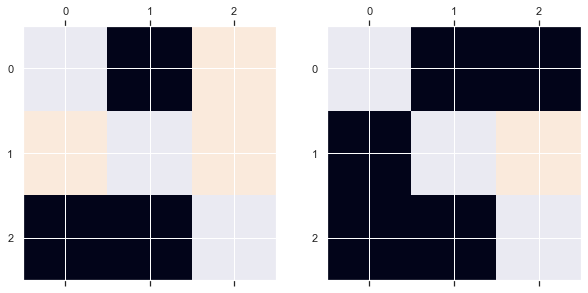

In [230]:
year_1 = "2014"
year_2 = "2015"

df_mass_mul_diff = mass_multiplications[year_2] - mass_multiplications[year_1]
df_mass_mul_diff[df_mass_mul_diff >0] = 1
df_mass_mul_diff[df_mass_mul_diff <0] = -1
df_mass_mul_diff.values[[np.arange(df_mass_mul_diff.shape[0])]*2] = np.nan



df_demand_diff = df_lunl_minimal[year_2] - df_lunl_minimal[year_1]
df_demand_diff[df_demand_diff >0] = 1
df_demand_diff[df_demand_diff <0] = -1

fig, ax = plt.subplots(ncols=2, figsize=(10,5))

ax[0].matshow(df_mass_mul_diff)
ax[1].matshow(df_demand_diff)

In [231]:
df_demand_diff

destination,AT,CH,DE
origin,,,
AT,NaN,-1.0,-1.0
CH,-1.0,NaN,1.0
DE,-1.0,-1.0,NaN


## Four Stage Model

In [25]:
df_load_selected_com_minimal = df_load_selected_com.loc[
    (
        df_load_selected_com.origin.isin(lunl_minimal)
    ) & (
        df_load_selected_com.destination.isin(lunl_minimal)
    )
]
df_load_selected_com_minimal

,unit,carriage,destination,origin,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
50,MIO_TKM,HIRE,AT,CH,9.0,20.0,20.0,16.0,30.0,46.0,53.0,37.0,64.0,47.0
53,MIO_TKM,HIRE,AT,DE,2050.0,2000.0,1896.0,2076.0,2033.0,2057.0,2250.0,2055.0,2393.0,2536.0
186,MIO_TKM,HIRE,CH,AT,98.0,140.0,136.0,150.0,134.0,137.0,176.0,217.0,219.0,246.0
191,MIO_TKM,HIRE,CH,DE,1752.0,1873.0,1901.0,2116.0,2172.0,2253.0,2295.0,2213.0,2347.0,2244.0
261,MIO_TKM,HIRE,DE,AT,1404.0,1428.0,1473.0,1456.0,1547.0,1548.0,1485.0,1825.0,2073.0,2007.0
264,MIO_TKM,HIRE,DE,CH,191.0,143.0,182.0,155.0,276.0,164.0,257.0,373.0,375.0,429.0
267,MIO_TKM,HIRE,DE,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_load_selected_com_minimal_origin = df_load_selected_com_minimal.groupby("origin").sum()
df_load_selected_com_minimal_origin

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
origin,,,,,,,,,,
AT,1502.0,1568.0,1609.0,1606.0,1681.0,1685.0,1661.0,2042.0,2292.0,2253.0
CH,200.0,163.0,202.0,171.0,306.0,210.0,310.0,410.0,439.0,476.0
DE,3802.0,3873.0,3797.0,4192.0,4205.0,4310.0,4545.0,4268.0,4740.0,4780.0


In [27]:
df_load_selected_com_minimal_dest = df_load_selected_com_minimal.groupby("destination").sum()
df_load_selected_com_minimal_dest

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
destination,,,,,,,,,,
AT,2059.0,2020.0,1916.0,2092.0,2063.0,2103.0,2303.0,2092.0,2457.0,2583.0
CH,1850.0,2013.0,2037.0,2266.0,2306.0,2390.0,2471.0,2430.0,2566.0,2490.0
DE,1595.0,1571.0,1655.0,1611.0,1823.0,1712.0,1742.0,2198.0,2448.0,2436.0


In [28]:
total_demand_dest = df_load_selected_com_minimal_dest.to_dict()
total_demand_origin = df_load_selected_com_minimal_origin.to_dict()

## Build a Symmetric Linear Model

In [29]:
from sympy.solvers import solve
from sympy import Symbol

In [30]:
lunl_minimal

['AT', 'CH', 'DE']

In [31]:

f12_s = Symbol("f12")
f13_s = Symbol("f13")
f23_s = Symbol("f23")

sols_s = {}
for year in years:
    d1, d2, d3 = [total_demand_dest[year][i] for i in lunl_minimal]

    eqns = [
        f12_s * d2 + f13_s * d3 - 1,
        f12_s * d1 + f23_s * d3 - 1,
        f13_s * d1 + f23_s * d2 - 1
    ]
    sols_s[year] = solve(eqns, f12_s, f13_s, f23_s, dict=True)[0]
    
print(sols_s)

{'2019': {f12: 0.000303742304713650, f13: 0.000274656260990437, f23: 0.000234855545200373}, '2018': {f12: 0.000302735191551942, f13: 0.000248627663530198, f23: 0.000247278747972678}, '2017': {f12: 0.000294397077859187, f13: 0.000241881058852468, f23: 0.000263404953970874}, '2016': {f12: 0.000289739080834145, f13: 0.000213191336331364, f23: 0.000244485315266896}, '2015': {f12: 0.000267589995791711, f13: 0.000210058952114270, f23: 0.000245727832518760}, '2014': {f12: 0.000276652003414130, f13: 0.000197898196168358, f23: 0.000244276189731357}, '2013': {f12: 0.000266398955631746, f13: 0.000196170023326037, f23: 0.000221861771056308}, '2012': {f12: 0.000228579971516024, f13: 0.000202252351781648, f23: 0.000237402502087569}, '2011': {f12: 0.000204213961033914, f13: 0.000194439124177686, f23: 0.000203531984370781}, '2010': {f12: 0.000205001189426696, f13: 0.000200963480430019, f23: 0.000193137080341069}}


Define the model

In [32]:
float(sols_s["2019"][f12_s])

0.00030374230471365

In [33]:
def gravity_model(coef_o_d, op, dq, all_coeff):
    
    g = float(all_coeff[coef_o_d] * op * dq)
    
    return g    

In [34]:
total_demand_origin["2019"]["AT"]

1502.0

In [35]:
gravity_model(f12_s, total_demand_origin["2019"]["AT"], total_demand_dest["2019"]["CH"], sols_s["2019"])

844.0087421078192

In [36]:
gravity_model(f13_s, total_demand_origin["2019"]["AT"], total_demand_dest["2019"]["DE"], sols_s["2019"])

657.9912578921808

In [37]:
gravity_model(f23_s, total_demand_origin["2019"]["CH"], total_demand_dest["2019"]["DE"], sols_s["2019"])

74.91891891891892

The results are far from being correct

## Introduce Symmetry Breaking

In [38]:
lunl_minimal

['AT', 'CH', 'DE']

In [46]:

f12 = Symbol("f12")
f13 = Symbol("f13")
f21 = Symbol("f21")
f23 = Symbol("f23")
f31 = Symbol("f31")
f32 = Symbol("f32")

sols = {}
for year in years:

    d1, d2, d3 = [total_demand_dest[year][i] for i in lunl_minimal]

    eqns = [
        f12 * d2 + f13 * d3 - 1,
        f21 * d1 + f23 * d3 - 1,
        f31 * d1 + f32 * d2 - 1
    ]
    sols[year] = solve(eqns, f12, f13, f21, f23, f31, f32, dict=True)[0]
    
print(sols)

{'2019': {f31: 0.000485672656629432 - 0.898494414764449*f32, f21: 0.000485672656629432 - 0.774647887323944*f23, f12: 0.000540540540540541 - 0.862162162162162*f13}, '2018': {f31: 0.000495049504950495 - 0.996534653465347*f32, f21: 0.000495049504950495 - 0.777722772277228*f23, f12: 0.000496770988574267 - 0.780427223050174*f13}, '2017': {f31: 0.000521920668058455 - 1.06315240083507*f32, f21: 0.000521920668058455 - 0.863778705636743*f23, f12: 0.000490918016691213 - 0.812469317623957*f13}, '2016': {f31: 0.000478011472275335 - 1.08317399617591*f32, f21: 0.000478011472275335 - 0.770076481835564*f23, f12: 0.000441306266548985 - 0.710944395410415*f13}, '2015': {f31: 0.000484730974309258 - 1.11778962675715*f32, f21: 0.000484730974309258 - 0.883664566165778*f23, f12: 0.000433651344319167 - 0.790546400693842*f13}, '2014': {f31: 0.000475511174512601 - 1.13647170708512*f32, f21: 0.000475511174512601 - 0.814075130765573*f23, f12: 0.000418410041841004 - 0.716317991631799*f13}, '2013': {f31: 0.000434216

In [81]:
year_slice = 3

system_y = np.array([1, 1, 1] * len(years[:year_slice]))

system_A_nested = [[
        [total_demand_origin[year]["CH"], total_demand_origin[year]["DE"], 0, 0, 0, 0],
        [0, 0, total_demand_origin[year]["AT"], total_demand_origin[year]["DE"], 0, 0],
        [0, 0, 0, 0, total_demand_origin[year]["AT"], total_demand_origin[year]["CH"]]
    ] for year in years[:year_slice]
]

system_A = np.array(
    [item for sublist in system_A_nested for item in sublist]
)
system_A_T = np.transpose(system_A)

In [82]:
system_x = np.matmul(
    np.matmul(
        system_A_T,
        np.linalg.pinv(
            np.matmul(
                system_A, system_A_T,
            )
        )
    ),
    system_y
)

In [83]:
system_x

array([4.62077592e-04, 2.38748790e-04, 4.80157321e-05, 2.41902148e-04,
       5.76484352e-04, 5.31941301e-04])

In [84]:
system_x[0] * total_demand_origin["2019"]["AT"] * total_demand_dest["2019"]["CH"]

1283.9750053370456

In [85]:
system_x[1] * total_demand_origin["2019"]["AT"] * total_demand_dest["2019"]["DE"]

571.968089786805

<AxesSubplot:xlabel='destination', ylabel='origin'>

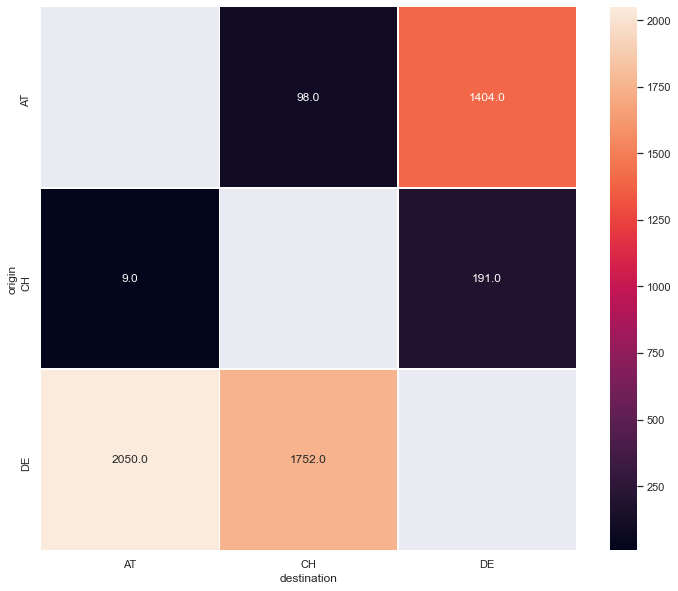

In [86]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    df_lunl_minimal["2019"], annot=True, fmt="0.1f", linewidths=.5, ax=ax
)



The results are still not as expected! We need to introduce more knowledge in to the coefficients. Now we need to introduce the gravity model!